In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# ============================================================
# 🛒 PRODUCT RECOMMENDATION SYSTEM (BEGINNER-FRIENDLY)
# Co-Occurrence Based Recommendation Engine
# Kaggle Notebook – Ready to Run
# ============================================================

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# ============================================================
# 1. Generate Synthetic E-commerce Dataset
# ============================================================

users = range(1, 501)  # 500 users
products = {
    1: "Laptop",
    2: "Mouse",
    3: "Keyboard",
    4: "Monitor",
    5: "Headphones",
    6: "Smartphone",
    7: "Charger",
    8: "Shoes",
    9: "Socks",
    10: "Backpack"
}

orders = []
order_id = 1000

for _ in range(5000):  # 5000 orders
    user = np.random.choice(users)
    num_items = np.random.randint(1, 5)

    purchased_products = np.random.choice(list(products.keys()), num_items, replace=False)

    for p in purchased_products:
        orders.append([order_id, user, p, products[p], np.random.randint(1, 3)])

    order_id += 1

df = pd.DataFrame(orders, columns=["order_id", "user_id", "product_id", "product_name", "quantity"])

df.head()


,order_id,user_id,product_id,product_name,quantity
0,1000,103,4,Monitor,2
1,1000,103,10,Backpack,2
2,1000,103,1,Laptop,1
3,1000,103,9,Socks,2
4,1001,309,9,Socks,1


2. Save CSV (So You Can Upload to Tableau or GitHub)

In [2]:
df.to_csv("ecommerce_transactions.csv", index=False)
df.head()


,order_id,user_id,product_id,product_name,quantity
0,1000,103,4,Monitor,2
1,1000,103,10,Backpack,2
2,1000,103,1,Laptop,1
3,1000,103,9,Socks,2
4,1001,309,9,Socks,1


3. Top Products Plot

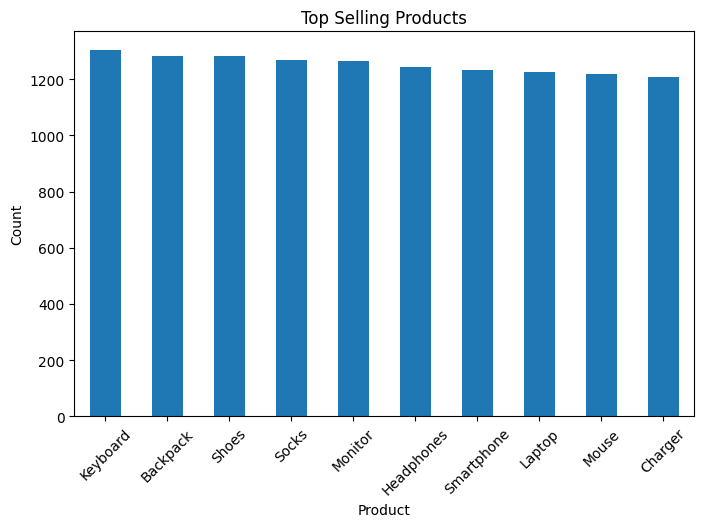

In [3]:
top_products = df["product_name"].value_counts().head(10)

plt.figure(figsize=(8,5))
top_products.plot(kind="bar")
plt.title("Top Selling Products")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


4. Build Co-Occurrence Matrix (Frequently Bought Together)

In [4]:
# Group by order and get product lists per order
order_groups = df.groupby("order_id")["product_name"].apply(list)

pair_counts = {}

for product_list in order_groups:
    # All combinations of 2 products
    pairs = itertools.combinations(sorted(set(product_list)), 2)
    for pair in pairs:
        pair_counts[pair] = pair_counts.get(pair, 0) + 1

# Convert to DataFrame
pair_df = (
    pd.DataFrame(pair_counts.items(), columns=["pair", "count"])
      .sort_values(by="count", ascending=False)
)

pair_df["Product_A"] = pair_df["pair"].apply(lambda x: x[0])
pair_df["Product_B"] = pair_df["pair"].apply(lambda x: x[1])
pair_df = pair_df[["Product_A", "Product_B", "count"]]

pair_df.head(10)


,Product_A,Product_B,count
29,Keyboard,Shoes,315
1,Backpack,Monitor,313
40,Charger,Keyboard,310
19,Shoes,Smartphone,304
22,Backpack,Smartphone,298
15,Charger,Shoes,298
4,Laptop,Socks,297
5,Monitor,Socks,296
18,Monitor,Smartphone,295
37,Shoes,Socks,295


5. Recommendation Table: “If a user buys X → Recommend Y”

In [5]:
recommendations = (
    pair_df
    .sort_values(["Product_A", "count"], ascending=[True, False])
    .groupby("Product_A")
    .head(1)
    .reset_index(drop=True)
)

recommendations.rename(columns={"Product_B": "Recommended_Product", "count": "Co_Purchase_Count"}, inplace=True)

recommendations


,Product_A,Recommended_Product,Co_Purchase_Count
0,Backpack,Monitor,313
1,Charger,Keyboard,310
2,Headphones,Socks,292
3,Keyboard,Shoes,315
4,Laptop,Socks,297
5,Monitor,Socks,296
6,Mouse,Shoes,291
7,Shoes,Smartphone,304
8,Smartphone,Socks,260


6. Save Recommendation Table as CSV

In [6]:
recommendations.to_csv("product_recommendations.csv", index=False)
recommendations


,Product_A,Recommended_Product,Co_Purchase_Count
0,Backpack,Monitor,313
1,Charger,Keyboard,310
2,Headphones,Socks,292
3,Keyboard,Shoes,315
4,Laptop,Socks,297
5,Monitor,Socks,296
6,Mouse,Shoes,291
7,Shoes,Smartphone,304
8,Smartphone,Socks,260


ecommerce_transactions.csv

→ Upload to Tableau for dashboards
→ Upload to GitHub as dataset

✔ product_recommendations.csv

→ Your final recommendation engine output

✔ Plots

→ Top products chart
→ Insight for portfolio

1️⃣ Generate E-commerce Transaction Dataset

Creates realistic customer orders including:

order_id

user_id

product_name

quantity

This dataset is saved as:
📁 ecommerce_transactions.csv

2️⃣ Identify Frequently Bought Together (Co-Occurrence Model)

If customers often buy Laptop → Mouse together, the model recommends:

“If user buys Laptop, recommend Mouse.”

This is simple but highly interpretable for interviews and dashboards.

Output saved as:
📁 product_recommendations.csv

3️⃣ Visual Insights

The notebook automatically creates:

Top selling products bar chart

Co-purchase pair table

Recommendation lookup table